### 텐서를 다루다

In [25]:
from tkinter.scrolledtext import example

import numpy as np
from sympy.physics.continuum_mechanics.beam import numpy
from sympy.physics.vector.printing import params

import dezero.functions as F
from Scratch3.dezero.core import Function
from Scratch3.dezero.functions import broadcast_to
from dezero import Variable
from dezero import Function

x = Variable(np.array(1.0))
y = F.sin(x)
print(y)

variable(0.8414709848078965)


In [26]:
x = Variable(np.array([[1,2,3], [4,5,6]]))
y = F.sin(x)
print(y)

variable([[ 0.84147098  0.90929743  0.14112001]
          [-0.7568025  -0.95892427 -0.2794155 ]])


In [27]:
x = Variable(np.array([[1,2,3], [4,5,6]]))
c = Variable(np.array([[10,20,30], [40,50,60]]))
y = x+c
print(y)

variable([[11 22 33]
          [44 55 66]])


In [28]:
x = Variable(np.array([[1,2,3], [4,5,6]]))
c = Variable(np.array([[10,20,30], [40,50,60]]))

t = x + c
y = F.sum(t)
print(y)

variable(231)


In [29]:
y.backward(retain_grad=True)
print(y.grad)
print(t.grad)
print(x.grad)
print(c.grad)

variable(1)
variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])


### 형상 변환 함수

In [30]:
import numpy as np

x = np.array([[1,2,3], [4,5,6]])
y = np.reshape(x, (6,))
print(y)

[1 2 3 4 5 6]


In [31]:
class Reshape(Function):
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x):
        self.x_shape = x.shape
        y = x.reshape(self.shape)
        return y

    def backward(self, gy):
        return np.reshape(gy, self.x_shape)

In [32]:
from dezero.core import as_variable

def reshape(x, shape):
    if x.shape == shape:
        return as_variable(x)
    return Reshape(shape)(x)

In [33]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1,2,3], [4,5,6]]))
y = F.reshape(x, (6,))
y.backward(retain_grad=True)
print(x.grad)

variable([[1 1 1]
          [1 1 1]])


In [34]:
x = np.random.rand(1,2,3)

y = x.reshape((2,3))
y = x.reshape([2,3])
y = x.reshape(2,3)

In [35]:
x = np.array([[1,2,3], [4,5,6]])
y = np.transpose(x)

print(y)

[[1 4]
 [2 5]
 [3 6]]


In [36]:
class Transpose(Function):
    def forward(self, x):
        y = np.transpose(x)
        return y

    def backward(self, gy):
        gx = transpose(gy)
        return gx

def transpose(x):
    return Transpose()(x)

In [37]:
x = Variable(np.array([[1,2,3], [4,5,6]]))
y = F.transpose(x)
y.backward()

print(x.grad)

variable([[1 1 1]
          [1 1 1]])


In [38]:
x = Variable(np.random.rand(2,3))
y = F.transpose(x)
y = x.T
y

variable([[0.01632294 0.47316193]
          [0.41608249 0.52043201]
          [0.08420576 0.29977813]])

In [39]:
A, B, C, D = 1, 2, 3, 4
x = np.random.rand(A, B, C, D)
y = x.transpose(1,0,3,2)

print(x)
print(y)

[[[[0.09378038 0.83527243 0.02675811 0.30766595]
   [0.8204467  0.97121553 0.26757308 0.57126221]
   [0.30325834 0.77661084 0.20565208 0.07270807]]

  [[0.23297817 0.67172007 0.103746   0.99190037]
   [0.37736757 0.4068899  0.2368764  0.77812888]
   [0.21443103 0.59340779 0.09457967 0.32073761]]]]
[[[[0.09378038 0.8204467  0.30325834]
   [0.83527243 0.97121553 0.77661084]
   [0.02675811 0.26757308 0.20565208]
   [0.30766595 0.57126221 0.07270807]]]


 [[[0.23297817 0.37736757 0.21443103]
   [0.67172007 0.4068899  0.59340779]
   [0.103746   0.2368764  0.09457967]
   [0.99190037 0.77812888 0.32073761]]]]


### 합계 함수

In [40]:
class Sum(Function):

    def forward(self, x):
        self.x_shape = x.shape
        y = x.sum()
        return y

    def backward(self, gy):
        gx = broadcast_to(gy, self.x_shape)
        return gx
def sum(x):
    return Sum()(x)


In [41]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([1,2,3,4,5,6]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

variable(21)
variable([1 1 1 1 1 1])


In [42]:
x = Variable(np.array([[1,2,3], [4,5,6]]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

variable(21)
variable([[1 1 1]
          [1 1 1]])


In [43]:
x = np.array([[1,2,3], [4,5,6]])
y = np.sum(x, axis=0)
print(y)
print(x.shape, '->', y.shape)

[5 7 9]
(2, 3) -> (3,)


In [44]:
x = np.array([[1,2,3], [4,5,6]])
y = np.sum(x, axis=1)
print(y)
print(x.shape, '->', y.shape)

[ 6 15]
(2, 3) -> (2,)


In [45]:
x = np.array([[1,2,3], [4,5,6]])
y = np.sum(x, keepdims=True)
print(y)
print(y.shape)

[[21]]
(1, 1)


In [46]:
from dezero import utils

class Sum(Function):
    def __init__(self, axis, keepdims):
        self.axis = axis
        self.keepdims = keepdims

    def forward(self, x):
        self.x_shape = x.shape
        y = x.sum(axis=self.axis, keepdims=self.keepdims)
        return y

    def backward(self, gy):
        gy = utils.reshape_sum_backward(gy, self.x_shape, self.axis, self.keepdims)
        gx = broadcast_to(gy, self.x_shape)
        return gx
def sum(x, axis=None, keepdims=False):
    return Sum(axis, keepdims)(x)


In [47]:
x = Variable(np.array([[1,2,3], [4,5,6]]))
y = F.sum(x, axis=0)
y.backward()
print(y)
print(x.grad)

x = Variable(np.random.randn(2,3,4,5))
y = x.sum(keepdims=True)
print(y)

variable([5 7 9])
variable([[1 1 1]
          [1 1 1]])
variable([[[[-7.61264594]]]])


### 브로드캐스트 함수

In [48]:
import numpy as np

x = np.array([1,2,3])
y = np.broadcast_to(x, (2,3))
print(y)

[[1 2 3]
 [1 2 3]]


In [49]:
import numpy as np
from dezero.utils import sum_to

x = np.array([[1,2,3], [4,5,6]])
y = sum_to(x, (1,3))
print(y)

y = sum_to(x, (2,1))
print(y)

[[5 7 9]]
[[ 6]
 [15]]


In [50]:
class BroadcastTo(Function):
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x):
        self.x_shape = x.shape
        y = np.broadcast_to(x, self.shape)
        return y

    def backward(self, gy):
        gx = sum_to(gy, self.x_shape)
        return gx

def broadcast_to(x, shape):
    if x.shape == shape:
        return as_variable(x)
    return BroadcastTo(shape)(x)

In [51]:
from dezero import Variable
from dezero import utils

class SumTo(Function):
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x):
        self.x_shape = x.shape
        y = utils.sum_to(x, self.shape)
        return y

    def backward(self, gy):
        gx = utils.sum_to(gy, self.x_shape)
        return gx

def sum_to(x, shape):
    if x.shape == shape:
        return as_variable(x)
    return SumTo(shape)(x)

In [52]:
x0 = np.array([1,2,3])
x1 = np.array([10])
y = x0 + x1
print(y)

[11 12 13]


In [53]:
class Add(Function):
    # def __init__(self, x_shape, y_shape):
    #     self.x_shape = x_shape
    #     self.y_shape = y_shape

    def forward(self, x0, x1):
        self.x0_shape, self.x1_shape = x0.shape, x1.shape
        y = x0 + x1
        return y

    def backward(self, gy):
        gx0, gx1 = gy, gy
        if self.x0_shape != self.x1_shape:
            gx0 = dezero.functions.sum_to(gx0, self.x0_shape)
            gx1 = dezero.functions.sum_to(gx1, self.x1_shape)
        return gx0, gx1


In [54]:
import  numpy as np
from dezero import Variable

x0 = Variable(np.array([1,2,3]))
x1 = Variable(np.array([10]))
y = x0 + x1
print(y)

y.backward()
print(x1.grad)

variable([11 12 13])
variable([3])


### 행렬

In [55]:
import numpy as np

a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.dot(a,b)
print(c)

a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])
c = np.dot(a,b)
print(c)

32
[[19 22]
 [43 50]]


In [56]:
class MatMul(Function):
    def forward(self, x, W):
        y = x.dot(W)
        return y

    def backward(self, gy):
        x, W = self.inputs
        gx = matmul(gy, W.t)
        gW = matmul(x.t, gy)
        return gx, gW

def matmul(x, W):
    return MatMul()(x, W)

In [57]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.random.rand(2,3))
W = Variable(np.random.rand(3,4))
y = F.matmul(x,W)
y.backward()

print(x.grad.shape)
print(W.grad.shape)

(2, 3)
(3, 4)


### 선형 회귀

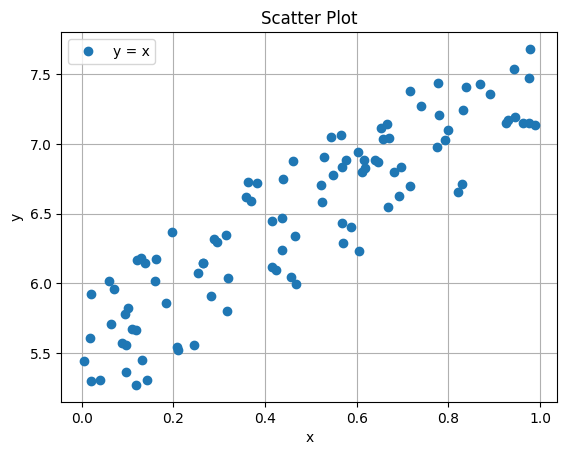

In [58]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x= np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)


# Plotting with dots
plt.plot(x, y, 'o', label='y = x')  # 'o' is for dots
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.legend()
plt.grid()
plt.show()



In [59]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

# Generate toy dataset
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)

W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))


variable([[0.64433458]]) variable([1.29473389]) variable(42.296340129442335)
variable([[1.12672345]]) variable([2.26959351]) variable(23.97380754378544)
variable([[1.48734571]]) variable([3.00386712]) variable(13.609686745040522)
variable([[1.75641886]]) variable([3.557186]) variable(7.747049961219976)
variable([[1.95666851]]) variable([3.97439789]) variable(4.43057410592155)
variable([[2.10518573]]) variable([4.28923203]) variable(2.554280381353593)
variable([[2.21482401]]) variable([4.52705574]) variable(1.492599869047195)
variable([[2.29524981]]) variable([4.70694745]) variable(0.8916952181756939)
variable([[2.35373273]]) variable([4.84325585]) variable(0.5514270962227455)
variable([[2.39573972]]) variable([4.9467725]) variable(0.3585915308319281)
variable([[2.425382]]) variable([5.02561369]) variable(0.24915731977561134)
variable([[2.44575118]]) variable([5.08588371]) variable(0.1869065876539789)
variable([[2.45917205]]) variable([5.13217364]) variable(0.1513533629631488)
variable(

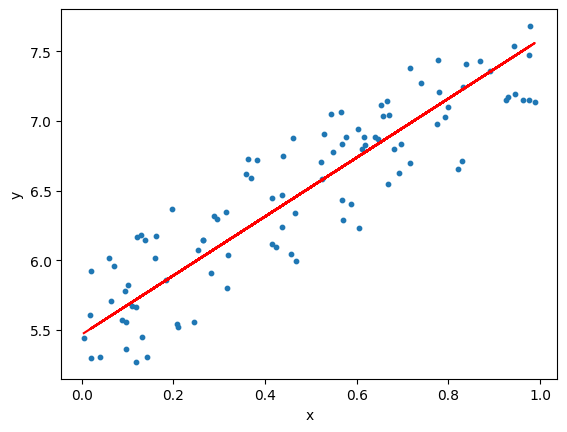

In [60]:
def predict(x):
    y = F.matmul(x, W) + b
    return y


def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)
lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    # Update .data attribute (No need grads when updating params)
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    print(W, b, loss)


# Plot
plt.scatter(x.data, y.data, s=10)
plt.xlabel('x')
plt.ylabel('y')
y_pred = predict(x)
plt.plot(x.data, y_pred.data, color='r')
plt.show()

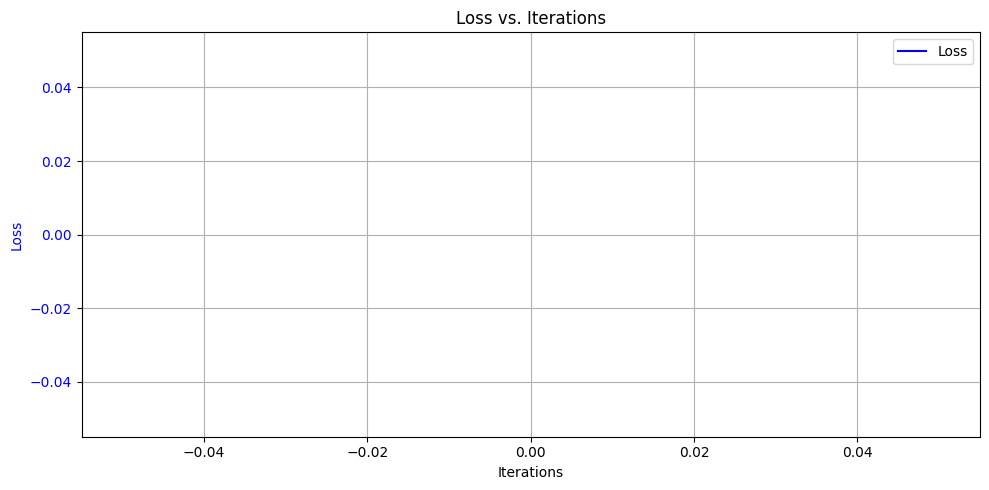

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming loss values and optionally accuracy values are captured during the training loop
loss_values = []  # Example: append loss.item() in the loop
accuracy_values = []  # Example: append accuracy.item() if available in the loop

iterations = list(range(1, len(loss_values) + 1))

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(iterations, loss_values, label='Loss', color='blue')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

if accuracy_values:  # If accuracy data exists
    ax2 = ax1.twinx()
    ax2.plot(iterations, accuracy_values, label='Accuracy', color='green')
    ax2.set_ylabel('Accuracy', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
plt.title('Loss and Accuracy vs. Iterations' if accuracy_values else 'Loss vs. Iterations')
plt.tight_layout()
plt.show()


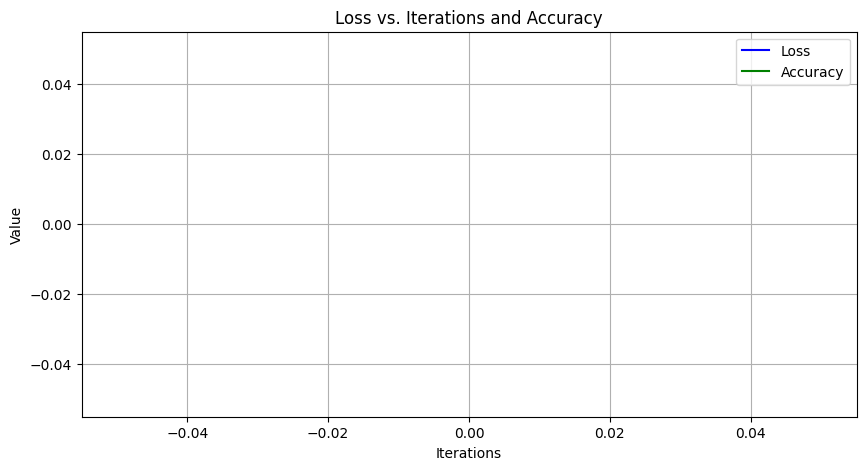

In [62]:
import matplotlib.pyplot as plt

# Assuming `loss_values` is a list of logged loss values, and `accuracy_values` is optional
iterations = list(range(1, len(loss_values) + 1))

plt.figure(figsize=(10, 5))
plt.plot(iterations, loss_values, label='Loss', color='blue')

if 'accuracy_values' in globals():  # Check if accuracy data exists
    plt.plot(iterations, accuracy_values, label='Accuracy', color='green')

plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Loss vs. Iterations' + (' and Accuracy' if 'accuracy_values' in globals() else ''))
plt.legend()
plt.grid()
plt.show()


### 신경망

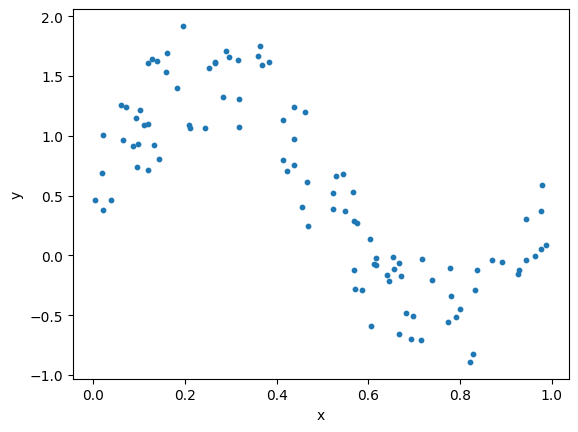

In [63]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)



# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [64]:
def sigmode_simple(x):
    x = as_variable(x)
    return 1 / (1 + np.exp(-x))

variable(0.8473695850105871)
variable([[ 0.01116761 -0.01095183 -0.0113574  -0.00434691 -0.00488941  0.01932679
            0.0095788   0.00081124 -0.01235646  0.00851092]]) variable([-0.00054239 -0.00083768  0.00064423  0.00017187  0.00049935  0.00017284
           0.00046463 -0.00035303 -0.00056084  0.00036961]) variable([[0.09856291]
          [0.09289951]
          [0.12022085]
          [0.11158004]
          [0.11761326]
          [0.11183161]
          [0.11711588]
          [0.10195223]
          [0.09799043]
          [0.11535314]]) variable([0.21690767])
variable(0.2514286285183606)
variable([[ 0.02501899 -0.79870039 -1.79510312 -1.25590914 -1.47526543 -0.24827789
           -0.95016383 -0.67784228 -1.05839651 -0.92249254]]) variable([ 0.03800681 -0.05590512  0.55674435  0.08760867  0.24855231 -0.01355955
          -0.03370617 -0.06000938 -0.00389916 -0.03935218]) variable([[-0.41043921]
          [ 0.43396078]
          [ 1.56840494]
          [ 0.9470266 ]
          [ 1.206

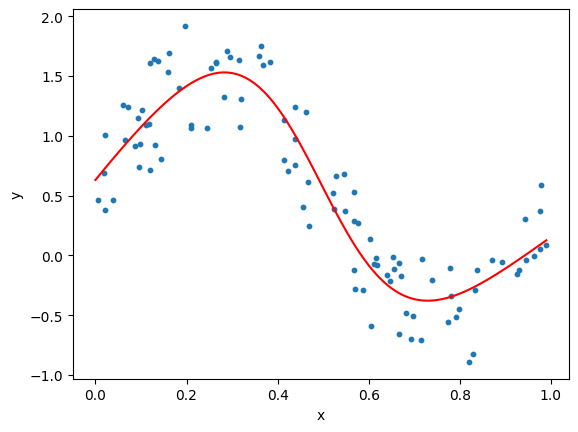

In [65]:
import numpy as np
from dezero import Variable
import dezero.functions as F

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

def predict(x):
    y = F.matmul(x, W1) + b1
    y = F.sigmoid(y)
    y = F.matmul(y, W2) + b2
    return y

lr = 0.2
iters = 10000


for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0:
        print(loss)
        print(W1, b1, W2, b2)

# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()




### 매개변수를 모아두는 계층

In [66]:
class Parameter(Variable):
    pass

In [67]:
import numpy as np
from dezero import Variable, Parameter

x = Variable(np.array(1.0))
p = Parameter(np.array(1.0))
y = x * p
print(isinstance(p, Variable))
print(isinstance(x, Parameter))
print(isinstance(y, Variable))

True
False
True


In [68]:
from dezero.core import Parameter

class Layer:
    def __init__(self):
        self.params = set()

    def __setattr__(self, name, value):
        if isinstance(value, Parameter):
            self.params.add(name)
        super().__setattr__(name, value)

In [69]:
layer = Layer()

layer.p1 = Parameter(np.array(1))
layer.p2 = Parameter(np.array(2))
layer.p3 = Variable(np.array(3))
layer.p4 = 'test'

print(layer.params)
print('-------')

for name in layer.params:
    print(name, layer.__dict__[name])

{'p1', 'p2'}
-------
p1 variable(1)
p2 variable(2)


In [70]:
import numpy as np
import dezero.functions as F
from dezero.core import Parameter


class Linear(Layer):
    def __init__(self, in_size, out_size, nobias=False, dtype=np.float32):
        super().__init__()

        I,O = in_size, out_size
        W_data = np.random.randn(I,O).astype(dtype) * np.sqrt(1 / I)
        self.W = Parameter(W_data, name = 'W')
        if nobias:
            self.b = None
        else:
            self.b = Parameter(np.zeros(O), name = 'b')

def forward(self, x):
    y = F.matmul(x, self.W, self.b)
    return y



In [71]:
import numpy as np
from dezero import Variable
import dezero.functions as F
import dezero.layers as L

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

l1 = L.Linear(10)
l2 = L.Linear(1)

def predict(x):
    y = l1(x)
    y = F.sigmoid(y)
    y = l2(y)
    return y

lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    l1.cleargrads()
    l2.cleargrads()
    loss.backward()

    for l in [l1, l2]:
        for p in l.params():
            p.data -= lr * p.grad.data

    if i % 1000 == 0:
        print(loss)
        print(l1.W, l1.b, l2.W, l2.b)

variable(0.8165178479901415)
variable([[ 1.12461795 -1.08301928 -1.14506181 -0.4372511  -0.49636721  1.93027768
            0.95109036  0.08641164 -1.22756376  0.84566517]]) variable([-0.01506845 -0.0232611   0.01790163  0.00474059  0.01378049  0.00481166
           0.01288377 -0.0097204  -0.01559578  0.01023669]) variable([[-0.2153014 ]
          [-0.40034925]
          [ 0.46340847]
          [ 0.19220751]
          [ 0.38283954]
          [ 0.20732449]
          [ 0.37083702]
          [-0.11096403]
          [-0.23983926]
          [ 0.31478154]]) variable([0.18884811])
variable(0.2499028014603372)
variable([[ 1.45064545 -1.04695876 -1.7654422  -0.67723019 -0.88161527  2.00114406
            0.88506781  0.16517767 -1.29194816  0.79428554]]) variable([-0.38383013  0.00222203  0.70373905  0.05592795  0.13629414 -0.59775907
           0.01846814 -0.01312148  0.13953714  0.01191833]) variable([[-0.97612365]
          [ 0.26218907]
          [ 1.43233821]
          [ 0.57281943]
       

In [72]:
import dezero.layers as L
import dezero.functions as F
from dezero import Layer

model = Layer()
model.l1 = L.Linear(5)
model.l2 = L.Linear(3)

def predict(model, x):
    y = model.l1(x)
    y = F.sigmoid(y)
    y = model.l2(y)
    return y


for p in model.params():
    print(p)

#model.clargrads()

variable(None)
variable([0. 0. 0. 0. 0.])
variable(None)
variable([0. 0. 0.])


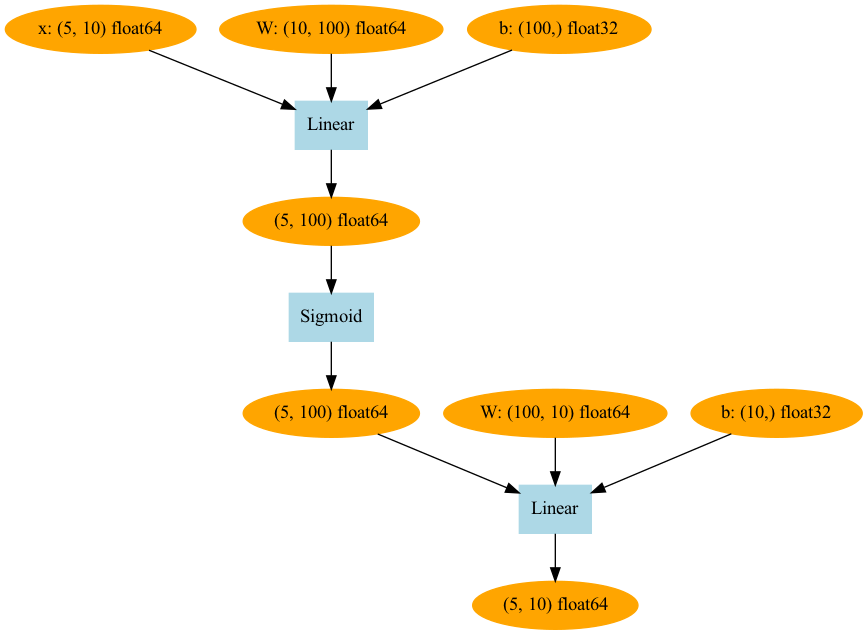

In [73]:
from dezero.models import Model
import numpy as np
from dezero import Variable, Model
import dezero.layers as L
import dezero.functions as F


class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):

        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y


x = Variable(np.random.rand(5,10), name = 'x')
model = TwoLayerNet(100, 10)
model.plot(x)

variable(0.8165178479901415)
variable([[ 1.12461795 -1.08301928 -1.14506181 -0.4372511  -0.49636721  1.93027768
            0.95109036  0.08641164 -1.22756376  0.84566517]]) variable([-0.01506845 -0.0232611   0.01790163  0.00474059  0.01378049  0.00481166
           0.01288377 -0.0097204  -0.01559578  0.01023669]) variable([[-0.2153014 ]
          [-0.40034925]
          [ 0.46340847]
          [ 0.19220751]
          [ 0.38283954]
          [ 0.20732449]
          [ 0.37083702]
          [-0.11096403]
          [-0.23983926]
          [ 0.31478154]]) variable([0.18884811])
variable(0.2499028014603372)
variable([[ 1.45064545 -1.04695876 -1.7654422  -0.67723019 -0.88161527  2.00114406
            0.88506781  0.16517767 -1.29194816  0.79428554]]) variable([-0.38383013  0.00222203  0.70373905  0.05592795  0.13629414 -0.59775907
           0.01846814 -0.01312148  0.13953714  0.01191833]) variable([[-0.97612365]
          [ 0.26218907]
          [ 1.43233821]
          [ 0.57281943]
       

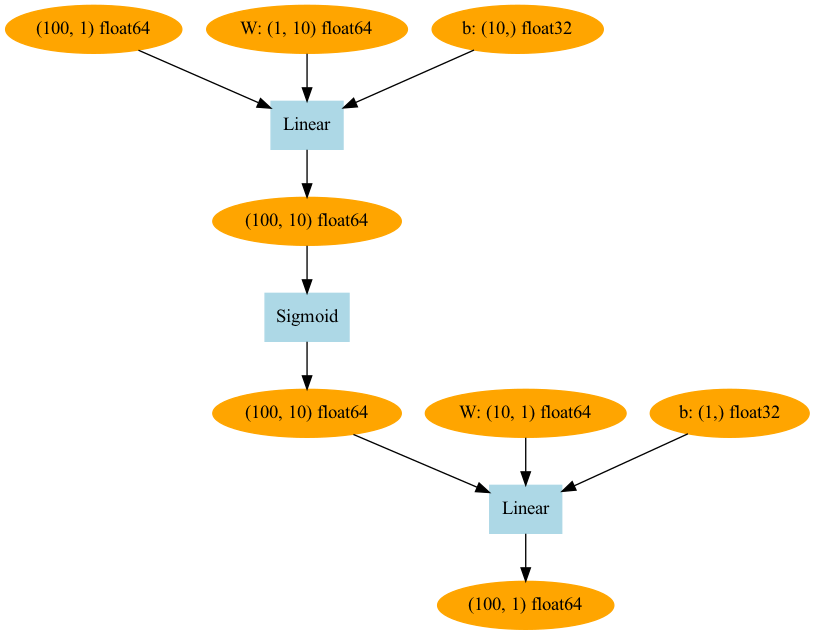

In [74]:
import numpy as np
from dezero import Variable, Model
import dezero.layers as L
import dezero.functions as F

from dezero.models import MLP


np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
max_iter = 10000
hidden_size = 10


class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):

        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y


model = TwoLayerNet(hidden_size, 1)


for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    for p in model.params():
        p.data -= lr * p.grad.data
    if i% 1000 == 0:
        print(loss)
        print(model.l1.W, model.l1.b, model.l2.W, model.l2.b)
model.plot(x)

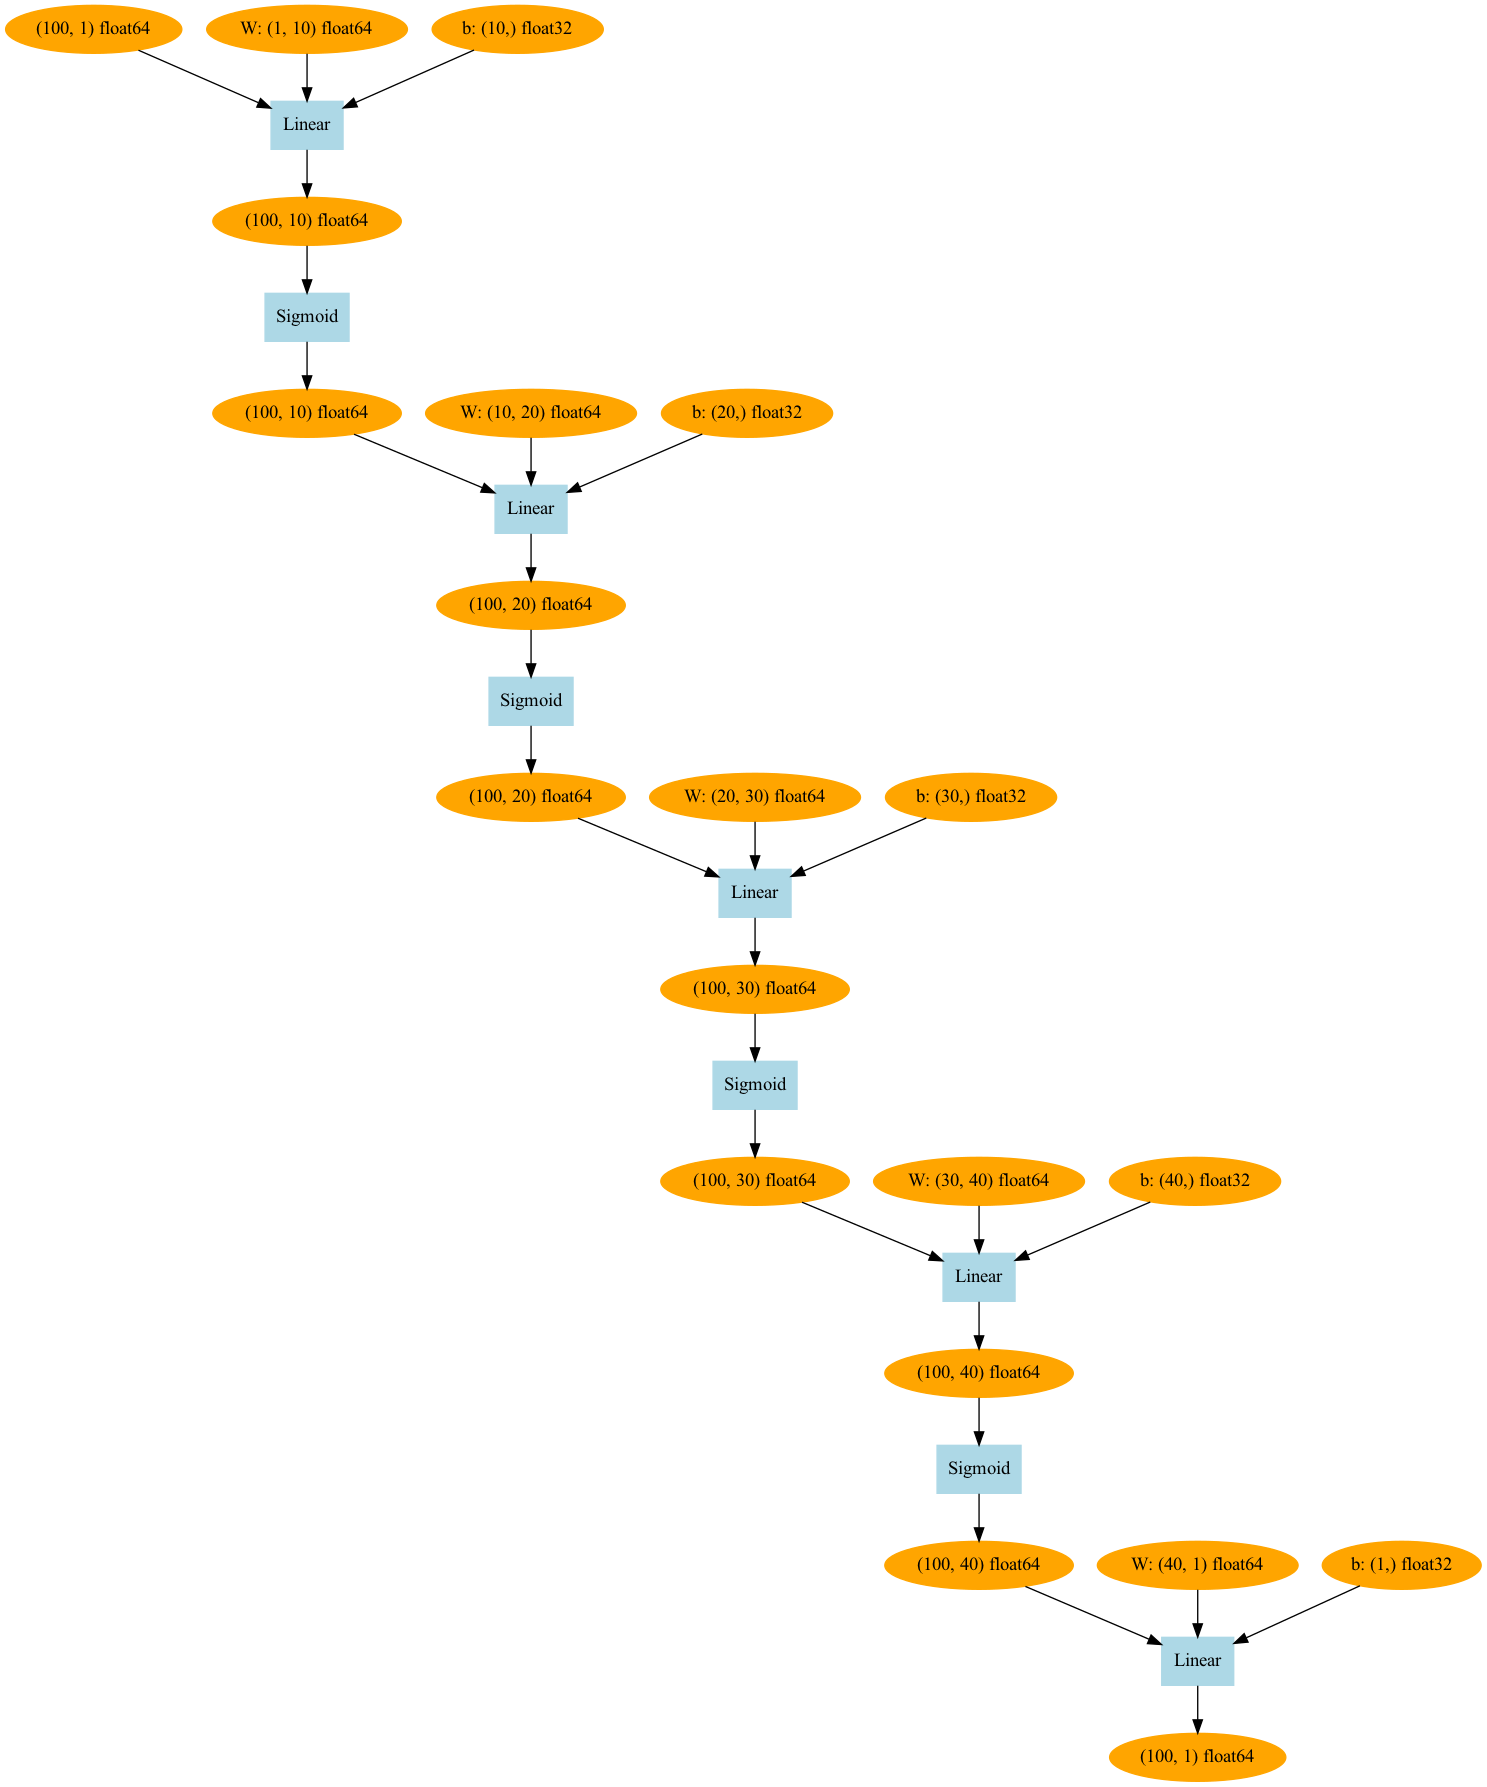

In [75]:
model2 = MLP((10, 1))
model2.plot(x)
model2 = MLP((10,20,30,40,1))
model2.plot(x)

### Optimizer로 수행하는 매개변수 갱신

In [76]:
class Optimizer:
    def __init__(self):
        self.target = None
        self.hook = []

    def setup(self, target):
        self.target = target
        return self

    def update(self):
        params = [p for p in self.target.params() if p.grad is not None]
        for f in self.hooks:
            f(params)

        for param in params:
            self.update_one(param)

    def update_one(self, param):
        raise NotImplementedError()

    def add_hook(self, f):
        self.hook.append(f)



In [77]:
class SGD(Optimizer):
    def __init__(self, lr=0.01):
        super().__init__()
        self.lr = lr

    def update_one(self, param):
        param.data -= self.lr * param.grad.data

In [78]:
import numpy as np
from dezero import Variable
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
max_iter = 10000
hidden_size = 10

model = MLP((hidden_size, 1))
optimizer = optimizers.SGD(lr)
optimizer.setup(model)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    optimizer.update()
    if i % 1000 == 0:
        print(loss)


variable(0.8165178479901415)
variable(0.2499028014603372)
variable(0.24609874026436843)
variable(0.2372158611083361)
variable(0.20793217994822144)
variable(0.12311919860580517)
variable(0.07888168390348675)
variable(0.07656075297857308)
variable(0.07643364647799143)
variable(0.07619374494842991)


### 소프트맥스 함수와 교차 엔트로피 오차

In [79]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1,2,3], [4,5,6]]))
y = F.softmax(x)
print(y)

variable([[0.09003057 0.24472847 0.66524096]
          [0.09003057 0.24472847 0.66524096]])


In [80]:
x = Variable(np.array([[1,2,3], [4,5,6]]))
indices = np.array([0,0,1])
y = F.get_item(x, indices)
print(y)

variable([[1 2 3]
          [1 2 3]
          [4 5 6]])


In [81]:
Variable.__getitem__ = F.get_item

y = x[1]
print(y)

y = x[:,2]
print(y)

variable([4 5 6])
variable([3 6])


In [82]:
from dezero.models import MLP

model = MLP((10, 3))

x = np.array([[0.2, -0.4]])
y = model(x)
print(y)

variable([[0.25337847 0.30853735 0.38821425]])


In [83]:
from dezero import Variable, as_variable
import dezero.functions as F

def softmax1d(x):
    x = as_variable(x)
    y = F.exp(x)
    sum_y = F.sum(y)
    return y / sum_y

In [84]:
model = MLP((10, 3))

x = Variable(np.array([[0.2 -0.4]]))
y = model(x)
p = softmax1d(y)
print(y)
print(p)

variable([[-0.51038322 -1.02080158  0.0629688 ]])
variable([[0.29634471 0.17787925 0.52577604]])


In [85]:
model = MLP((10, 3))
x = np.array([[0.2, -0.4], [0.3, 0.5], [1.3, -3.2], [2.1, 0.3]])
t = np.array([2, 0, 1, 0])
y = model(x)
loss = F.softmax_cross_entropy(y, t)
print(loss)

variable(1.3110249232057938)


### 다중 클래스 분류

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import dezero
from dezero.datasets import Spiral


import dezero.functions as F

#x, t = dezero.datasets.get_spiral(train=True)

dataset = Spiral(train=True)
x, t = dataset.data, dataset.label


print(x.shape)
print(t.shape)

print(x[10], t[10])
print(x[110], t[110])

(300, 2)
(300,)
[-0.12995958 -0.00324155] 1
[ 0.3282343  -0.54941994] 0


epoch 1, loss 1.13
epoch 2, loss 1.05
epoch 3, loss 0.95
epoch 4, loss 0.92
epoch 5, loss 0.87
epoch 6, loss 0.89
epoch 7, loss 0.84
epoch 8, loss 0.78
epoch 9, loss 0.80
epoch 10, loss 0.79
epoch 11, loss 0.78
epoch 12, loss 0.76
epoch 13, loss 0.77
epoch 14, loss 0.76
epoch 15, loss 0.76
epoch 16, loss 0.77
epoch 17, loss 0.78
epoch 18, loss 0.74
epoch 19, loss 0.74
epoch 20, loss 0.72
epoch 21, loss 0.73
epoch 22, loss 0.74
epoch 23, loss 0.77
epoch 24, loss 0.73
epoch 25, loss 0.74
epoch 26, loss 0.74
epoch 27, loss 0.72
epoch 28, loss 0.72
epoch 29, loss 0.72
epoch 30, loss 0.73
epoch 31, loss 0.71
epoch 32, loss 0.72
epoch 33, loss 0.72
epoch 34, loss 0.71
epoch 35, loss 0.72
epoch 36, loss 0.71
epoch 37, loss 0.71
epoch 38, loss 0.70
epoch 39, loss 0.71
epoch 40, loss 0.70
epoch 41, loss 0.71
epoch 42, loss 0.70
epoch 43, loss 0.70
epoch 44, loss 0.70
epoch 45, loss 0.69
epoch 46, loss 0.69
epoch 47, loss 0.71
epoch 48, loss 0.70
epoch 49, loss 0.69
epoch 50, loss 0.69
epoch 51,

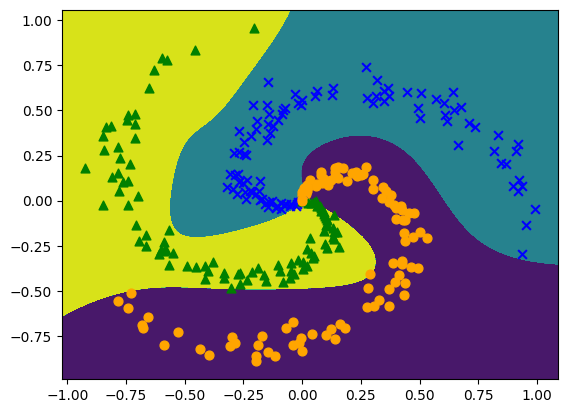

In [87]:
import math
import numpy as np
import matplotlib.pyplot as plt
import dezero
from dezero.datasets import Spiral
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

# Hyperparameters
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

#x, t = dezero.datasets.get_spiral(train=True)
dataset = Spiral(train=True)
x, t = dataset.data, dataset.label

model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(x)
max_iter = math.ceil(data_size / batch_size)

for epoch in range(max_epoch):
    # Shuffle index for data
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        batch_index = index[i * batch_size:(i + 1) * batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]

        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(batch_t)

    # Print loss every epoch
    avg_loss = sum_loss / data_size
    print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))

# Plot boundary area the model predict
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]

with dezero.no_grad():
    score = model(X)
predict_cls = np.argmax(score.data, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)

# Plot data points of the dataset
N, CLS_NUM = 100, 3
markers = ['o', 'x', '^']
colors = ['orange', 'blue', 'green']
for i in range(len(x)):
    c = t[i]
    plt.scatter(x[i][0], x[i][1], s=40,  marker=markers[c], c=colors[c])
plt.show()

### Dataset 클래스와 전처리

In [88]:
import dezero
from dezero.datasets import Spiral

#train_set = dezero.datasets.Spiral(train=True)

train_set = Spiral(train=True)

print(train_set[0])
print(len(train_set))

(array([-0.13981389, -0.00721657], dtype=float32), np.int64(1))
300


In [89]:
class BigData():
    def __getitem__(self, index):
        x = np.load('data/{}.npy'.format(index))
        t = np.load('label/{}.npy'.format(index))

        return x, t
    def __len__(self):
        return 10000

In [90]:
train_set = Spiral(train=True)

batch_index = [0, 1, 2]
batch = [train_set[i] for i in batch_index]


In [91]:
x = np.array([example[0] for example in batch])
t = np.array([example[1] for example in batch])

print(x.shape)
print(t.shape)

(3, 2)
(3,)


In [92]:
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

train_set = Spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(train_set)
max_iter = math.ceil(data_size / batch_size)

for epoch in range(max_epoch):
    index = np.random.permutation(data_size)
    sum_loss = 0
    for i in range(max_iter):
        batch_index = index[i * batch_size:(i + 1) * batch_size]
        batch = [train_set[i] for i in batch_index]
        x = np.array([example[0] for example in batch])
        t = np.array([example[1] for example in batch])

        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)

    avg_loss = sum_loss / data_size
    print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))

epoch 1, loss 1.13
epoch 2, loss 1.05
epoch 3, loss 0.95
epoch 4, loss 0.92
epoch 5, loss 0.87
epoch 6, loss 0.89
epoch 7, loss 0.84
epoch 8, loss 0.78
epoch 9, loss 0.80
epoch 10, loss 0.79
epoch 11, loss 0.78
epoch 12, loss 0.76
epoch 13, loss 0.77
epoch 14, loss 0.76
epoch 15, loss 0.76
epoch 16, loss 0.77
epoch 17, loss 0.78
epoch 18, loss 0.74
epoch 19, loss 0.74
epoch 20, loss 0.72
epoch 21, loss 0.73
epoch 22, loss 0.74
epoch 23, loss 0.77
epoch 24, loss 0.73
epoch 25, loss 0.74
epoch 26, loss 0.74
epoch 27, loss 0.72
epoch 28, loss 0.72
epoch 29, loss 0.72
epoch 30, loss 0.73
epoch 31, loss 0.71
epoch 32, loss 0.72
epoch 33, loss 0.72
epoch 34, loss 0.71
epoch 35, loss 0.72
epoch 36, loss 0.71
epoch 37, loss 0.71
epoch 38, loss 0.70
epoch 39, loss 0.71
epoch 40, loss 0.70
epoch 41, loss 0.71
epoch 42, loss 0.70
epoch 43, loss 0.70
epoch 44, loss 0.70
epoch 45, loss 0.69
epoch 46, loss 0.69
epoch 47, loss 0.71
epoch 48, loss 0.70
epoch 49, loss 0.69
epoch 50, loss 0.69
epoch 51,

In [93]:
class Dataset:
    def __init__(self, train=True, transform=None, target_transform=None):
        self.train = train
        self.transform = transform
        self.terget_transform = target_transform
        if self.transform is None:
            self.transform = lambda x: x
        if self.terget_transform is None:
            self.terget_transform = lambda x: x

        self.data = None
        self.target = None
        self.prepare()

    def __getitem__(self, index):
        assert np.isscalar(index)
        if self.label is None:
            return self.transform(self.data[index]), None
        else:
            return self.transform(self.data[index]), self.target_transform(self.target[index])

    def __len__(self):
        return len(self.data)

    def prepare(self):
        pass


In [94]:
def f(x):
    y = x / 2.0
    return y

train_set = Spiral(train=True)


In [95]:
from dezero import transforms

t = transforms.Normalize(mean=0.0, std=2.0)
train_set = Spiral(transform=f)

In [96]:
t = transforms.Compose([transforms.Normalize(mean=0.0, std=2.0),
                        transforms.AsType(np.float64)])


### DataLoader

In [97]:
t = [1,2,3]
x = iter(t)
next(x)

1

In [98]:
next(x)

2

In [99]:
next(x)

3

In [100]:
class MyIterator:
    def __init__(self, data):
        self.data = data
        self.index = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.index == self.data:
            raise StopIteration()

        self.index += 1
        return self.index

In [101]:
obj = MyIterator(5)
for x in obj:
    print(x)

1
2
3
4
5


In [102]:
import math
import random
import numpy as np

class DataLoader:
    def __init__(self, dataset, batch_size, shuffle=True):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.data_size = len(dataset)
        self.max_iter = math.ceil(self.data_size / self.batch_size)

        self.reset()

    def reset(self):
        self.iteration = 0
        if self.shuffle:
            self.index = np.random.permutation(len(self.dataset))
        else:
            self.index = np.arange(len(self.dataset))

    def __iter__(self):
        return self

    def __next__(self):
        if self.iteration >= self.max_iter:
            self.reset()
            raise StopIteration

        i, batch_size = self.iteration, self.batch_size
        batch_index = self.index[i * batch_size:(i + 1) * batch_size]
        batch = [self.dataset[i] for i in batch_index]
        x = np.array([example[0] for example in batch])
        y = np.array([example[1] for example in batch])

        self.iteration += 1
        return x, y

    def next(self):
        return self.__next__()

In [103]:
from dezero.datasets import Spiral
from dezero import DataLoader

batch_size = 10
max_epoch = 1

train_set = Spiral(train=True)
test_set = Spiral(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

for epoch in range(max_epoch):
    for x, t in train_loader:
        print(x.shape, t.shape)
        break
    for x, t in test_loader:
        print(x.shape, t.shape)
        break




(10, 2) (10,)
(10, 2) (10,)


In [104]:
def accuracy(y, t):
    y, t = as_variable(y), as_variable(t)

    pred = y.data.argmax(axis=1).reshape(t.shape)
    result = (pred == t.data)
    acc = result.mean()
    return Variable(as_array(acc))

In [105]:
import numpy as np
import dezero.functions as F

y = np.array([[0.2, 0.8, 0], [0.1, 0.9, 0], [0.8, 0.1, 0.1]])
t = np.array([1, 2, 0])
acc = F.accuracy(y, t)
print(acc)

variable(0.6666666666666666)


In [106]:
import matplotlib.pyplot as plt


max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

train_set = Spiral(train=True)
test_set = Spiral(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)

        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    print('epoch :{}'.format(epoch+1))
    print('train loss: {:.4f}, acc: {:.4f}'.format(sum_loss / len(train_set), sum_acc / len(train_set)))

    sum_loss, sum_acc = 0, 0
    with dezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)

            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)
    print('test loss: {:.4f}, acc: {:.4f}'.format(sum_loss / len(test_set), sum_acc / len(test_set)))

epoch :1
train loss: 1.0944, acc: 0.4033
test loss: 1.0468, acc: 0.3267
epoch :2
train loss: 0.9882, acc: 0.4933
test loss: 0.9729, acc: 0.4333
epoch :3
train loss: 0.9403, acc: 0.5133
test loss: 0.8965, acc: 0.6233
epoch :4
train loss: 0.8820, acc: 0.5700
test loss: 0.8771, acc: 0.5967
epoch :5
train loss: 0.8617, acc: 0.5600
test loss: 0.8670, acc: 0.5867
epoch :6
train loss: 0.8313, acc: 0.5300
test loss: 0.8654, acc: 0.6000
epoch :7
train loss: 0.8086, acc: 0.5833
test loss: 0.7950, acc: 0.5600
epoch :8
train loss: 0.7948, acc: 0.5733
test loss: 0.7921, acc: 0.5900
epoch :9
train loss: 0.7728, acc: 0.5500
test loss: 0.7718, acc: 0.5300
epoch :10
train loss: 0.7643, acc: 0.5633
test loss: 0.7796, acc: 0.5800
epoch :11
train loss: 0.7862, acc: 0.5600
test loss: 0.7701, acc: 0.5633
epoch :12
train loss: 0.7914, acc: 0.5500
test loss: 0.8218, acc: 0.6067
epoch :13
train loss: 0.7633, acc: 0.5567
test loss: 0.7757, acc: 0.5800
epoch :14
train loss: 0.7612, acc: 0.5833
test loss: 0.7800,

###

### MNIST 학습

In [107]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

train_set = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

#
print(len(train_set))
print(len(test_set))

60000
10000


In [108]:
x, t = train_set[0]
print(type(x), x.shape)
print(x)

<class 'torch.Tensor'> torch.Size([1, 28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          

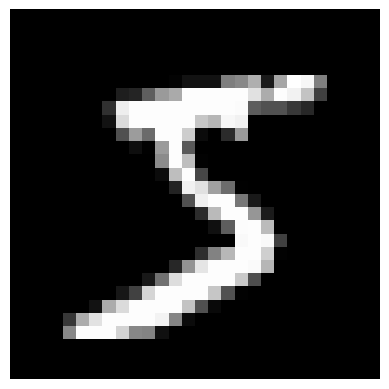

label: 5


In [109]:
import matplotlib.pyplot as plt

x, t = train_set[0]
plt.imshow(x.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()
print('label:', t)

In [110]:

def f(x):
    x = x.flatten()
    x = x.astype(np.float32)
    x /= 255.0
    return x

train_set = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)


In [111]:
max_epoch = 5
batch_index = 100
hidden_size = 1000

train_set = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(test_set, batch_size=100, shuffle=False)

model = MLP((hidden_size, 10))
optimizer = optimizers.SGD().setup(model)

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)

        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    print('epoch :{}'.format(epoch + 1))
    print('train loss: {:.4f}, acc: {:.4f}'.format(sum_loss / len(train_set), sum_acc / len(train_set)))

    sum_loss, sum_acc = 0, 0
    with dezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)

            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)
    print('test loss: {:.4f}, acc: {:.4f}'.format(sum_loss / len(test_set), sum_acc / len(test_set)))



epoch :1
train loss: 1.9252, acc: 0.5451
test loss: 1.5439, acc: 0.7565
epoch :2
train loss: 1.2908, acc: 0.7674
test loss: 1.0488, acc: 0.8139
epoch :3
train loss: 0.9300, acc: 0.8174
test loss: 0.7945, acc: 0.8368
epoch :4
train loss: 0.7438, acc: 0.8402
test loss: 0.6588, acc: 0.8587
epoch :5
train loss: 0.6382, acc: 0.8527
test loss: 0.5780, acc: 0.8697
